In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/My Drive/cap2.csv')

In [ ]:
data = df
display(data)

,latitude,longitude,accommodates,beds,price,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bathrooms
0,42.667190,-73.815800,2,1,50,248,4.75,4.57,4.92,4.92,4.82,4.81,1.94,1.0
1,42.657890,-73.753700,4,2,70,9,3.56,3.56,4.22,4.56,3.22,3.67,0.08,1.0
2,42.652220,-73.767240,2,4,125,292,4.74,4.87,4.86,4.80,4.82,4.78,2.51,1.0
3,42.646150,-73.759660,2,1,105,337,4.51,4.45,4.82,4.87,4.79,4.64,3.13,1.0
4,42.652220,-73.767240,2,1,126,306,4.73,4.71,4.83,4.68,4.81,4.72,2.87,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220458,38.906922,-77.024228,2,1,173,0,5.00,4.83,4.99,4.98,4.97,5.00,0.03,1.0
220459,38.949640,-77.016980,2,1,79,0,5.00,5.00,5.00,5.00,4.75,4.91,0.33,1.0
220460,38.951456,-77.016104,3,2,87,0,4.70,4.31,5.00,4.88,4.85,4.56,0.31,2.0
220461,38.951410,-77.016220,2,1,79,0,5.00,4.85,4.82,4.89,4.64,4.90,3.00,1.0


In [ ]:

import requests

def geocode(lat, lon):
    url = f"https://geocoding.geo.census.gov/geocoder/geographies/coordinates?x={lon}&y={lat}&benchmark=Public_AR_Census2020&vintage=Census2020_Census2020&layers=10&format=json"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()  # This contains the geocoded census information
    else:
        return None


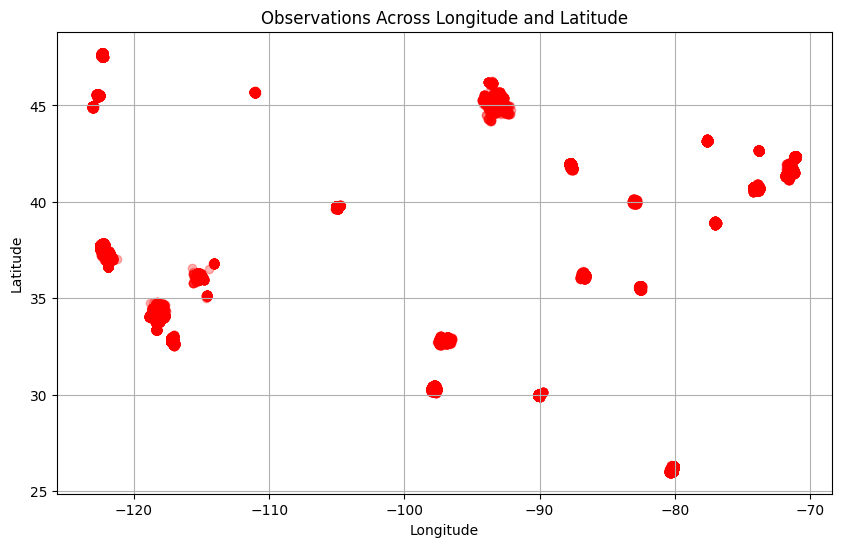

In [ ]:

# Plotting the observations based on latitude and longitude using the simplified approach
plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], c='red', alpha=0.3, marker='o')

plt.title('Observations Across Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


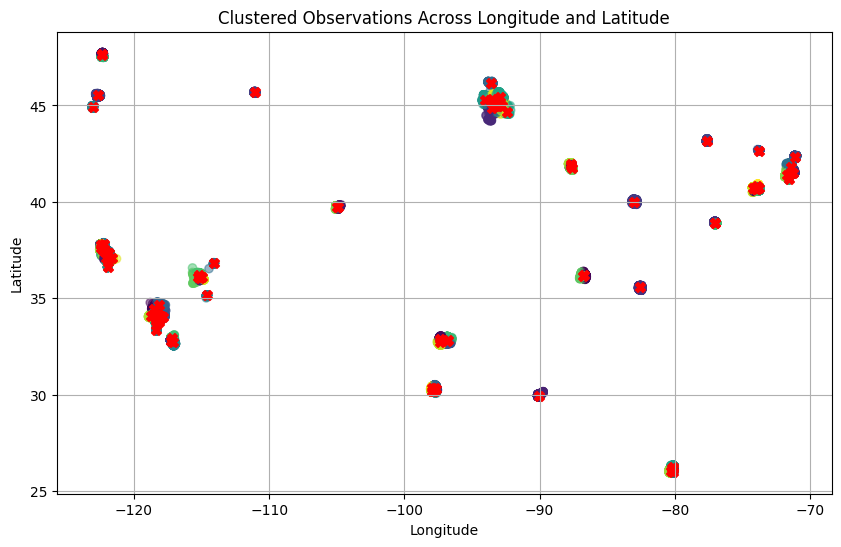

In [ ]:

from sklearn.cluster import KMeans

# Number of clusters - this is arbitrary for the demonstration, you may choose based on your analysis
k = 100

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(data[['latitude', 'longitude']])

# Assign the cluster labels to the dataframe
data['cluster'] = kmeans.labels_

# Plotting the clustered observations
plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], alpha=0.5, cmap='viridis')
plt.title('Clustered Observations Across Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=50, marker='X')

plt.show()


In [ ]:
# display(data)

In [ ]:
data.to_csv('clustered_data.csv', index=False)

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
#df = data
df = pd.read_csv('/content/drive/My Drive/clustered_data.csv')

df_cleaned = df.dropna()

In [6]:
column_range = df['cluster'].max() - df['cluster'].min()
print(column_range)

99


In [7]:
df, df_unseen = train_test_split(df_cleaned, test_size = 0.1, random_state=42, stratify=df_cleaned['cluster'])

In [ ]:
un_X = df_unseen.drop('price', axis=1)  # X contains all columns except 'price'
un_y = df_unseen['price']     # y is the target variable

In [8]:
X = df.drop('price', axis=1)  # X contains all columns except 'price'
y = df['price']     # y is the target variable

# Split data into training, calibration, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.7, random_state=42, stratify=df['cluster'])
X_calib, X_test, y_calib, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=X_temp['cluster'])

In [ ]:
# df.dtypes

In [9]:
import pandas as pd
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Initialize and train the XGBoost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 7, n_estimators = 300, gamma=0.1)
xg_reg.fit(X_train, y_train)

# Make predictions
y_pred = xg_reg.predict(X_test)

In [ ]:
display(X_calib["cluster"])

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error


# Predict on the calibration set
y_calib_pred = xg_reg.predict(X_calib)

# Calculate nonconformity scores for the calibration set
absolute_errors = np.abs(y_calib_pred - y_calib)

# Group nonconformity scores by 'cluster'
clusters = X_calib['cluster']
grouped_errors = {}
for cluster in np.unique(clusters):
    cluster_mask = clusters == cluster
    grouped_errors[cluster] = absolute_errors[cluster_mask]

# Determine the 90th percentile of nonconformity scores within each cluster
quantiles = {cluster: np.quantile(errors, 0.9) for cluster, errors in grouped_errors.items()}

display(quantiles)

{0: 160.0523193359375,
 1: 131.0074920654297,
 2: 126.7891845703125,
 3: 97.62963867187507,
 4: 211.9229431152344,
 5: 110.63789367675781,
 6: 129.55514678955083,
 7: 119.06636810302734,
 8: 139.8200836181643,
 9: 149.75762786865235,
 10: 177.3183258056641,
 11: 269.91967010498047,
 12: 223.40167236328125,
 13: 142.6031646728516,
 14: 140.0548095703125,
 15: 120.98119506835938,
 16: 179.278076171875,
 17: 124.09254455566406,
 18: 139.62494354248048,
 19: 93.83077697753909,
 20: 104.8457260131836,
 21: 141.6682891845703,
 22: 117.27235412597656,
 23: 126.96774291992188,
 24: 58.80442581176758,
 25: 126.21588439941408,
 26: 109.22324523925782,
 27: 108.416032409668,
 28: 156.61741333007822,
 29: 140.47478027343743,
 30: 119.93750000000004,
 31: 114.48623657226562,
 32: 101.27356185913081,
 33: 115.35058593750001,
 34: 268.64910583496095,
 35: 142.80567016601563,
 36: 124.70566558837892,
 37: 108.00653076171875,
 38: 100.12271270751955,
 39: 170.6649322509766,
 40: 224.5888671875,
 41: 22

In [11]:
pip install matplotlib

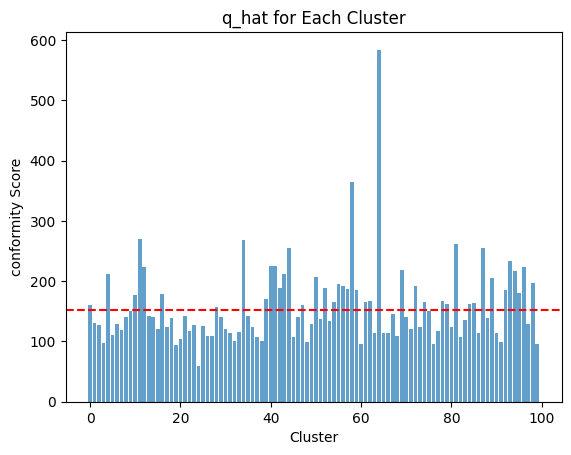

In [12]:
import matplotlib.pyplot as plt


plt.bar(quantiles.keys(), quantiles.values(), alpha=0.7)
plt.axhline(y=151.764, color='r', linestyle='--')
plt.xlabel('Cluster')
plt.ylabel('conformity Score')
plt.title('q_hat for Each Cluster')

plt.show()

In [ ]:
# Calculate the average
# average = sum(quantiles.values()) / len(quantiles)

# print("Average:", average)

In [ ]:
# Sort the dictionary by values in descending order
sorted_quantiles = sorted(quantiles.items(), key=lambda item: item[1], reverse=True)

# Display top 10 values
top_10_values = sorted_quantiles[:10]
print("Top 10 values:")
for key, value in top_10_values:
    print(f"{key}: {value}")

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Function to calculate prediction interval for a single test instance
def calculate_prediction_interval(x_instance, quantiles, model):
    y_pred = model.predict(x_instance.to_frame().T)
    cluster_of_instance = x_instance['cluster']
    quantile = quantiles[cluster_of_instance]
    lower_bound = y_pred - quantile
    upper_bound = y_pred + quantile
    return lower_bound[0], upper_bound[0]

# Run predictions and calculate intervals for the test set
prediction_intervals = []
for index, row in X_test.iterrows():
    lb, ub = calculate_prediction_interval(row, quantiles, xg_reg)
    prediction_intervals.append([lb, ub])

# Add intervals to the test DataFrame
# Assuming the test DataFrame is named X_test
interval_df = pd.DataFrame(prediction_intervals, columns=['Lower_Bound', 'Upper_Bound'], index=X_test.index)
X_test_with_intervals = X_test.join(interval_df)

# If you also want to include the predicted values in the DataFrame
y_test_pred = xg_reg.predict(X_test)
X_test_with_intervals['Predicted_Price'] = y_test_pred

# Add a column for the formatted interval for easier reading
X_test_with_intervals['Prediction_Interval'] = X_test_with_intervals.apply(lambda row: f"[{row['Lower_Bound']}, {row['Upper_Bound']}]", axis=1)

# Convert y_test to a DataFrame if it's not already (it could be a Series)
true_prices_df = y_test.to_frame(name='True_Price')

# Make sure indexes align; this step is crucial for accurate row-wise joining
X_test_with_intervals = X_test_with_intervals.join(true_prices_df)

print(X_test_with_intervals.head())  # Display the first few rows to verify

         latitude   longitude  accommodates  beds  number_of_reviews  \
157537  40.773878  -73.978451             2     1                  0   
12334   30.433920  -97.699447             4     1                  0   
16132   42.343830  -71.155460             2     1                  1   
201380  37.414020 -122.106520             2     1                  0   
68401   39.733970 -104.996580             2     1                 18   

        review_scores_rating  review_scores_cleanliness  \
157537                  4.84                       4.71   
12334                   4.72                       4.61   
16132                   4.00                       3.00   
201380                  4.96                       4.94   
68401                   5.00                       4.83   

        review_scores_checkin  review_scores_communication  \
157537                   5.00                         4.94   
12334                    4.93                         4.86   
16132                    5

In [14]:
# Add a column to check if the true price falls within the prediction interval
X_test_with_intervals['In_Interval'] = X_test_with_intervals.apply(lambda row: row['Lower_Bound'] <= row['True_Price'] <= row['Upper_Bound'], axis=1)

print(X_test_with_intervals.head())  # Display the first few rows to verify

         latitude   longitude  accommodates  beds  number_of_reviews  \
157537  40.773878  -73.978451             2     1                  0   
12334   30.433920  -97.699447             4     1                  0   
16132   42.343830  -71.155460             2     1                  1   
201380  37.414020 -122.106520             2     1                  0   
68401   39.733970 -104.996580             2     1                 18   

        review_scores_rating  review_scores_cleanliness  \
157537                  4.84                       4.71   
12334                   4.72                       4.61   
16132                   4.00                       3.00   
201380                  4.96                       4.94   
68401                   5.00                       4.83   

        review_scores_checkin  review_scores_communication  \
157537                   5.00                         4.94   
12334                    4.93                         4.86   
16132                    5

In [ ]:
X_test_with_intervals.to_csv('CC_data.csv', index=False)

In [26]:
import pandas as pd
import folium

# Assuming X_test_with_intervals is already defined

# Calculate the percentage of True values and mean coordinates for each cluster
cluster_info = X_test_with_intervals.groupby('cluster').agg(
    latitude_mean=('latitude', 'mean'),
    longitude_mean=('longitude', 'mean'),
    true_percentage=('In_Interval', lambda x: (x.sum() / x.count()) * 100)
).reset_index()

# Initialize the map
map_us = folium.Map(location=[39.8283, -98.5795], zoom_start=5)

'''
def get_color(true_percentage):
    if true_percentage > 88:
        return '#0000ff'  # Blue
    elif true_percentage > 85:
        return '#008000'  # Green
    else:
        return '#FFA500'  # Orange
'''

def get_color(true_percentage):

  true_percentage = max(min(true_percentage, 100), 80)

  # Define color thresholds
  red_threshold = 86
  blue_threshold = 92

  if true_percentage < red_threshold:
    # Below 86: Light purple (easily recognizable)
    color_code = "#D8BFD8"  # Adjust for desired light purple shade
  elif true_percentage < blue_threshold:
    # Between 86 and 92: Red (clear distinction)
    color_code = "#FF0000"
  else:
    # Above 92: Blue (clear distinction)
    color_code = "#0000FF"

  return color_code






# Add markers for each cluster
for _, row in cluster_info.iterrows():
    folium.CircleMarker(
        location=[row['latitude_mean'], row['longitude_mean']],
        radius=5,  # Fixed size, but you could adjust this based on true_percentage if desired
        popup=f"Cluster {int(row['cluster'])}, True %: {row['true_percentage']:.2f}",
        color=get_color(row['true_percentage']),
        fill=True,
        fill_color=get_color(row['true_percentage'])
    ).add_to(map_us)

# Display the map
map_file_path = 'Gradient_heat_map_by_cluster.html'
map_us.save(map_file_path)

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load your data
df = X_test_with_intervals[['latitude', 'longitude', 'In_Interval']]

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Load U.S. states boundary shapefile (assuming it's stored locally or using a direct link)
# You can download state shapefiles from the U.S. Census Bureau or use an API.
# Here, let's assume we have it at '/path/to/us_states.shp'. You need to replace this path or download it.
states = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_500k.zip')

# Ensure both GeoDataFrames use the same CRS
gdf = gdf.set_crs(states.crs)

# Spatial join points to states
merged = gpd.sjoin(gdf, states, how="left", op='intersects')

# Calculate the True Rate for 'LABEL' by state
true_rate_by_state = merged.groupby('NAME')['In_Interval'].mean() * 100  # Convert to percentage


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
type(true_rate_by_state)

pandas.core.series.Series

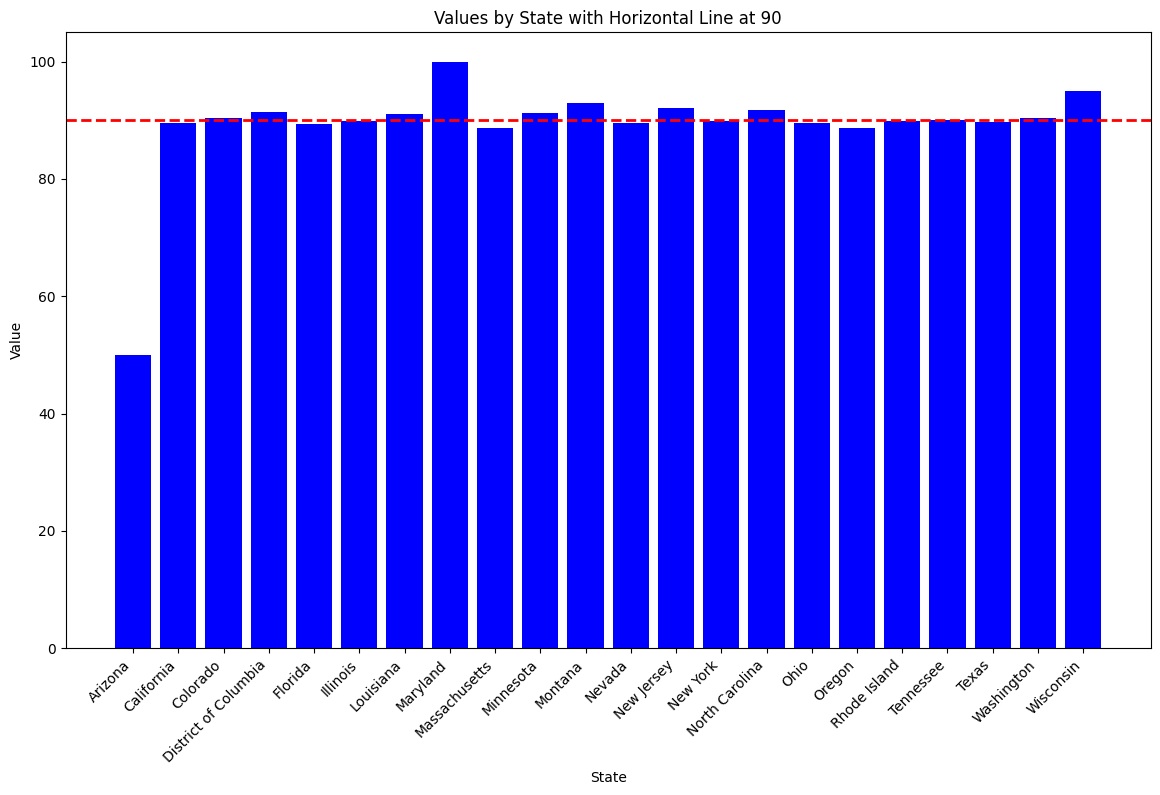

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated data provided
data = {
    'Arizona': 50.000000,
    'California': 89.603340,
    'Colorado': 90.373281,
    'District of Columbia': 91.485900,
    'Florida': 89.405883,
    'Illinois': 89.875873,
    'Louisiana': 90.992227,
    'Maryland': 100.000000,
    'Massachusetts': 88.750000,
    'Minnesota': 91.187990,
    'Montana': 92.982456,
    'Nevada': 89.515290,
    'New Jersey': 92.094456,
    'New York': 89.836936,
    'North Carolina': 91.666667,
    'Ohio': 89.506173,
    'Oregon': 88.629738,
    'Rhode Island': 89.786059,
    'Tennessee': 90.116061,
    'Texas': 89.739190,
    'Washington': 90.448055,
    'Wisconsin': 95.000000
}

# Convert the dictionary to a pandas Series
df = pd.Series(data)

# Creating the bar plot
plt.figure(figsize=(14, 8))
plt.bar(df.index, df.values, color='blue')

# Adding a horizontal line at y=90
plt.axhline(y=90, color='r', linestyle='--', linewidth=2)

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Value')
plt.title('Values by State with Horizontal Line at 90')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


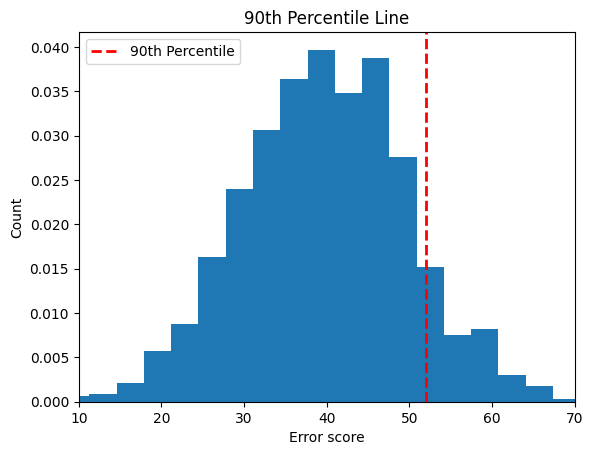

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate some data with a normal distribution (bell-shaped)
mean = 40
std = 10
data = np.random.normal(mean, std, 1000)

# Create the histogram
plt.hist(data, bins=20, density=True)  # density makes it a probability distribution

# Set the x-axis limits slightly wider than the data
plt.xlim(mean - 3*std, mean + 3*std)

# Add a vertical line at the 90th percentile
percentile = np.percentile(data, 90)
plt.axvline(x=percentile, color='r', linestyle='dashed', linewidth=2, label='90th Percentile')

# Label the axes and title the plot
plt.xlabel('Error score')
plt.ylabel('Count')
plt.title('90th Percentile Line')

# Add a legend for the vertical line
plt.legend()

plt.show()
